# Implement a KNN model to classify the animals in to categorie

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
#read Zoo data

In [34]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [35]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
#need to replace all "0 by nan"

In [36]:
df.loc[:,"hair":'catsize']

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
df.loc[:,"hair":'catsize'] = df.loc[:,"hair":'catsize'].replace(0, np.nan)
df.loc[:,"hair":'catsize']

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0
1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
2,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0
4,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,1.0
97,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN
98,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
99,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


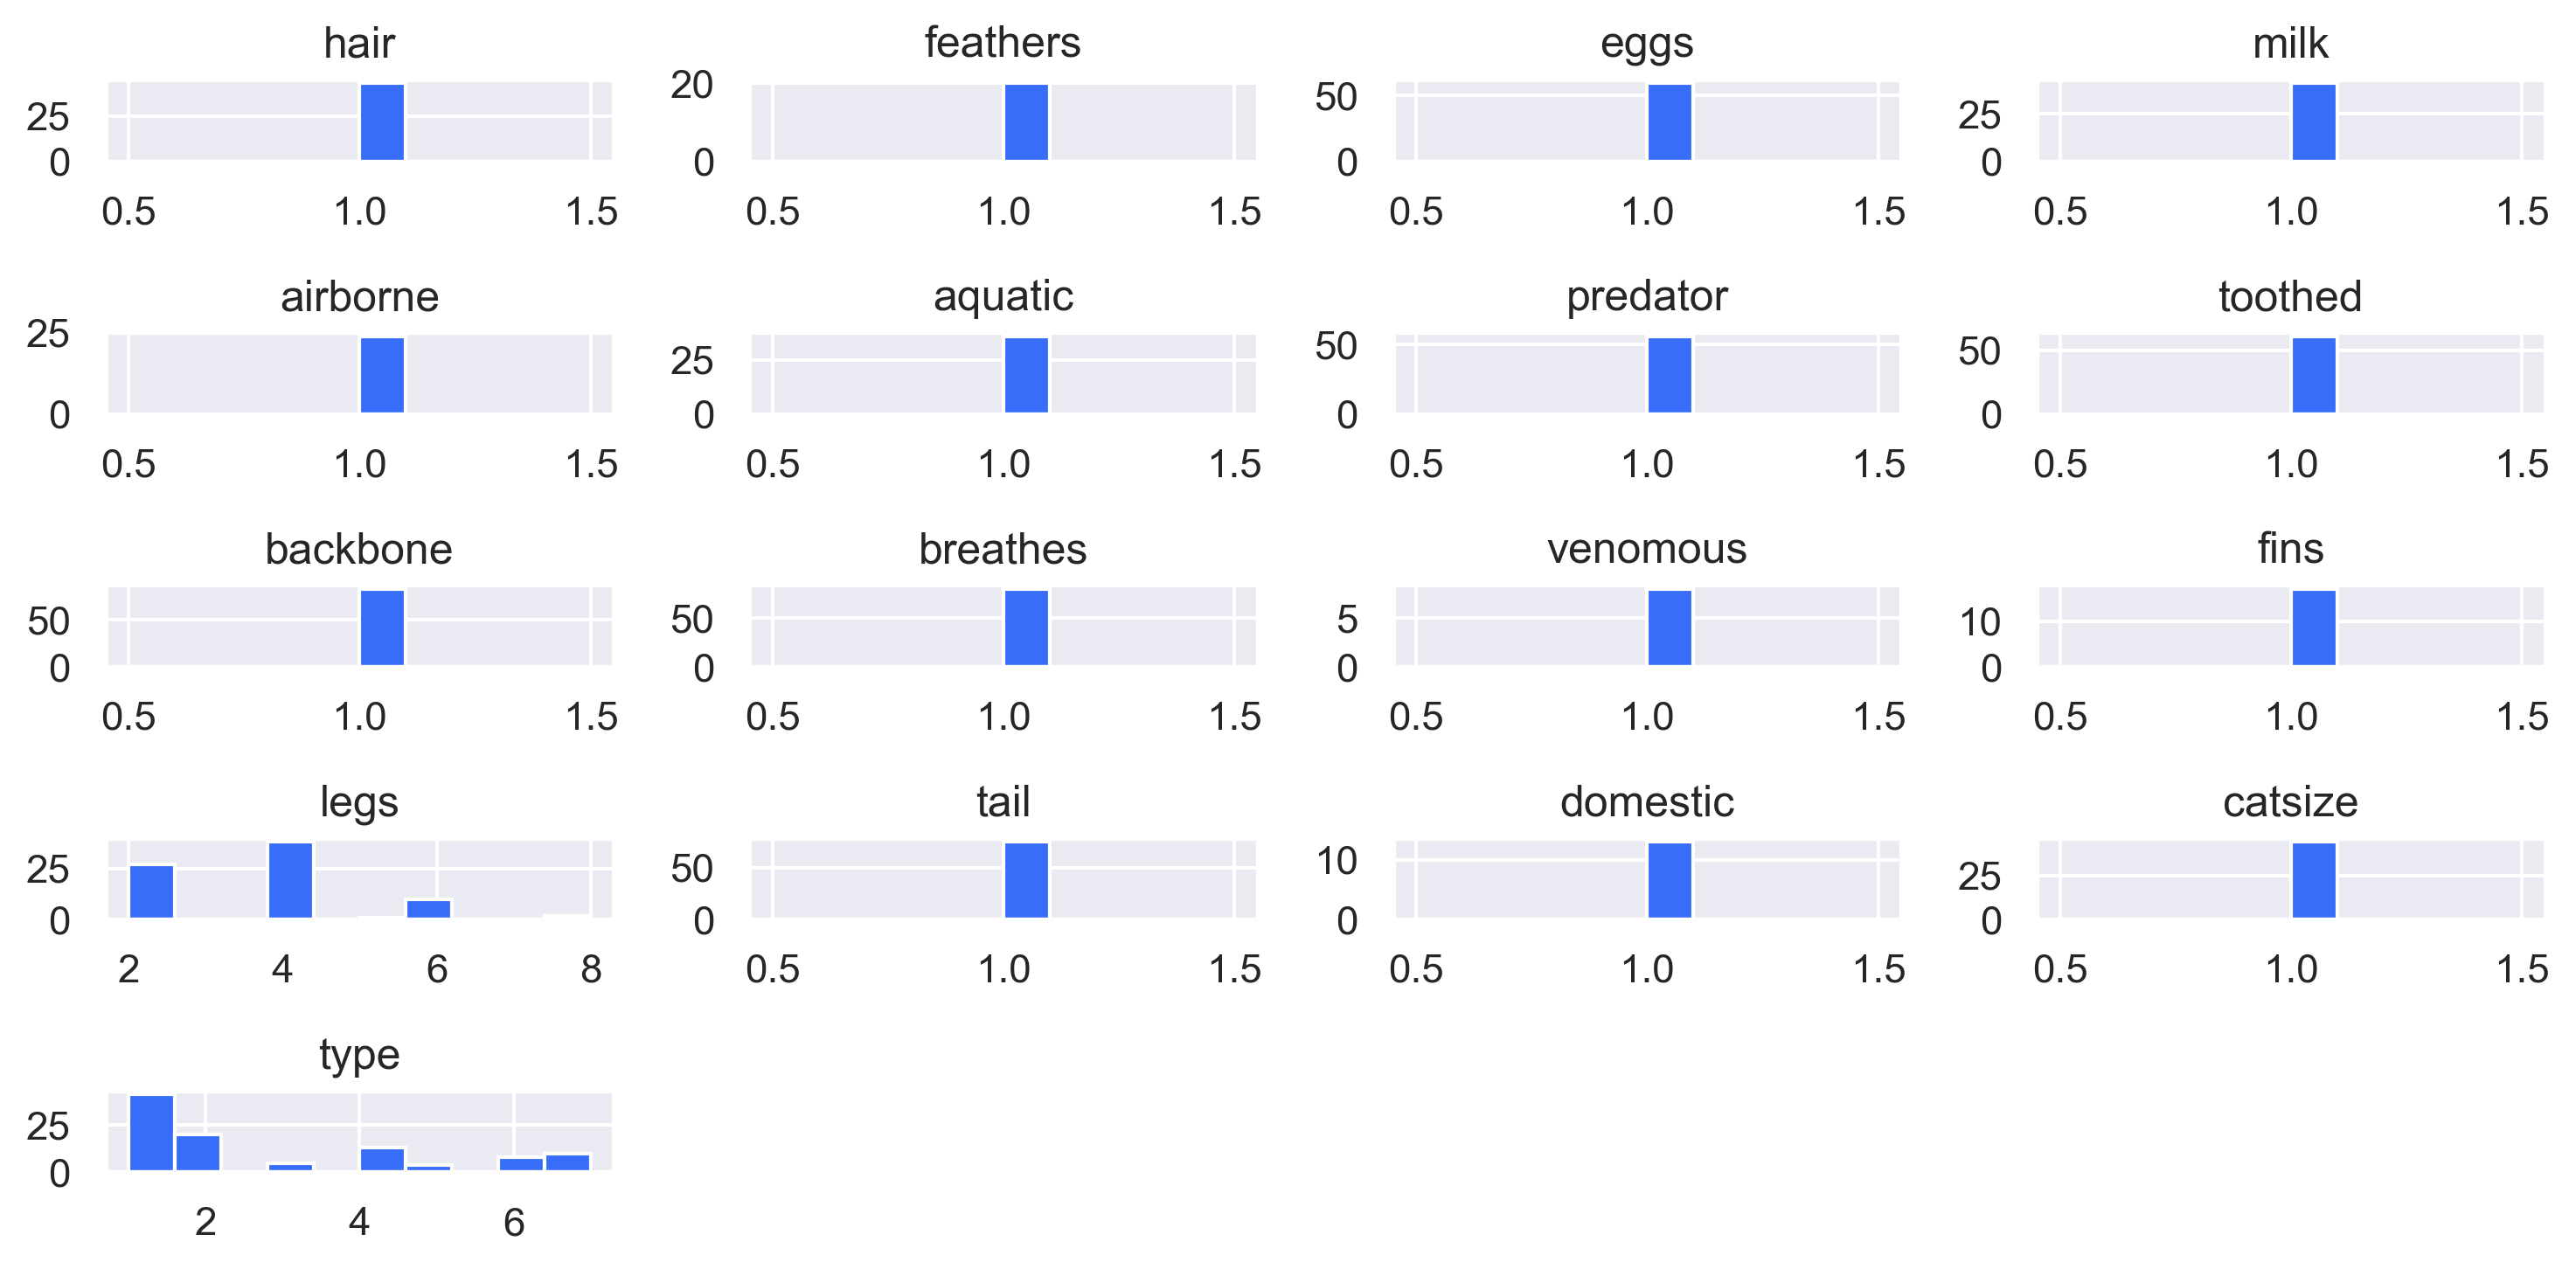

In [41]:
df.hist()
plt.tight_layout()

In [42]:
si = SimpleImputer(strategy='median')

df.loc[:,"hair":'catsize'] = si.fit_transform(df.loc[:,"hair":'catsize'])

In [43]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [44]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['animal name'], dtype='object')

In [45]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])
df[cat_cols]

,animal name
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,95.0
97,96.0
98,97.0
99,98.0


In [46]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,4
3,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
4,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
97,96.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,6
98,97.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
99,98.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,7


In [56]:
df.dtypes

animal name    float64
hair           float64
feathers       float64
eggs           float64
milk           float64
airborne       float64
aquatic        float64
predator       float64
toothed        float64
backbone       float64
breathes       float64
venomous       float64
fins           float64
legs           float64
tail           float64
domestic       float64
catsize        float64
type             int64
dtype: object

In [47]:
#Model building

In [48]:
x = df.iloc[:,:-1]
y = df['type']


In [57]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [58]:
x

array([[-1.70884021,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.67414817,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.63945614,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.65628693,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.69097896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.725671  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

#not done standadization as dataset values are not that scaled also considering k=3 we will finalize  K value after hypeparameter tunning

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.7875, 0.5238095238095238)

In [ ]:
#Hyperparameter Tuning for KNN

In [61]:
train_acc = []
test_acc = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [62]:
train_acc

[1.0,
 0.8375,
 0.7875,
 0.7375,
 0.675,
 0.6,
 0.6,
 0.5875,
 0.6,
 0.6,
 0.5875,
 0.575,
 0.5625,
 0.575,
 0.5625,
 0.55,
 0.5375,
 0.55,
 0.5375,
 0.525,
 0.5,
 0.5,
 0.4875,
 0.4875,
 0.4875,
 0.4875,
 0.475,
 0.4625,
 0.475]

In [63]:
test_acc

[0.42857142857142855,
 0.47619047619047616,
 0.5238095238095238,
 0.3333333333333333,
 0.42857142857142855,
 0.47619047619047616,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.6190476190476191,
 0.6666666666666666,
 0.6666666666666666,
 0.6190476190476191,
 0.6666666666666666,
 0.6190476190476191,
 0.5714285714285714]

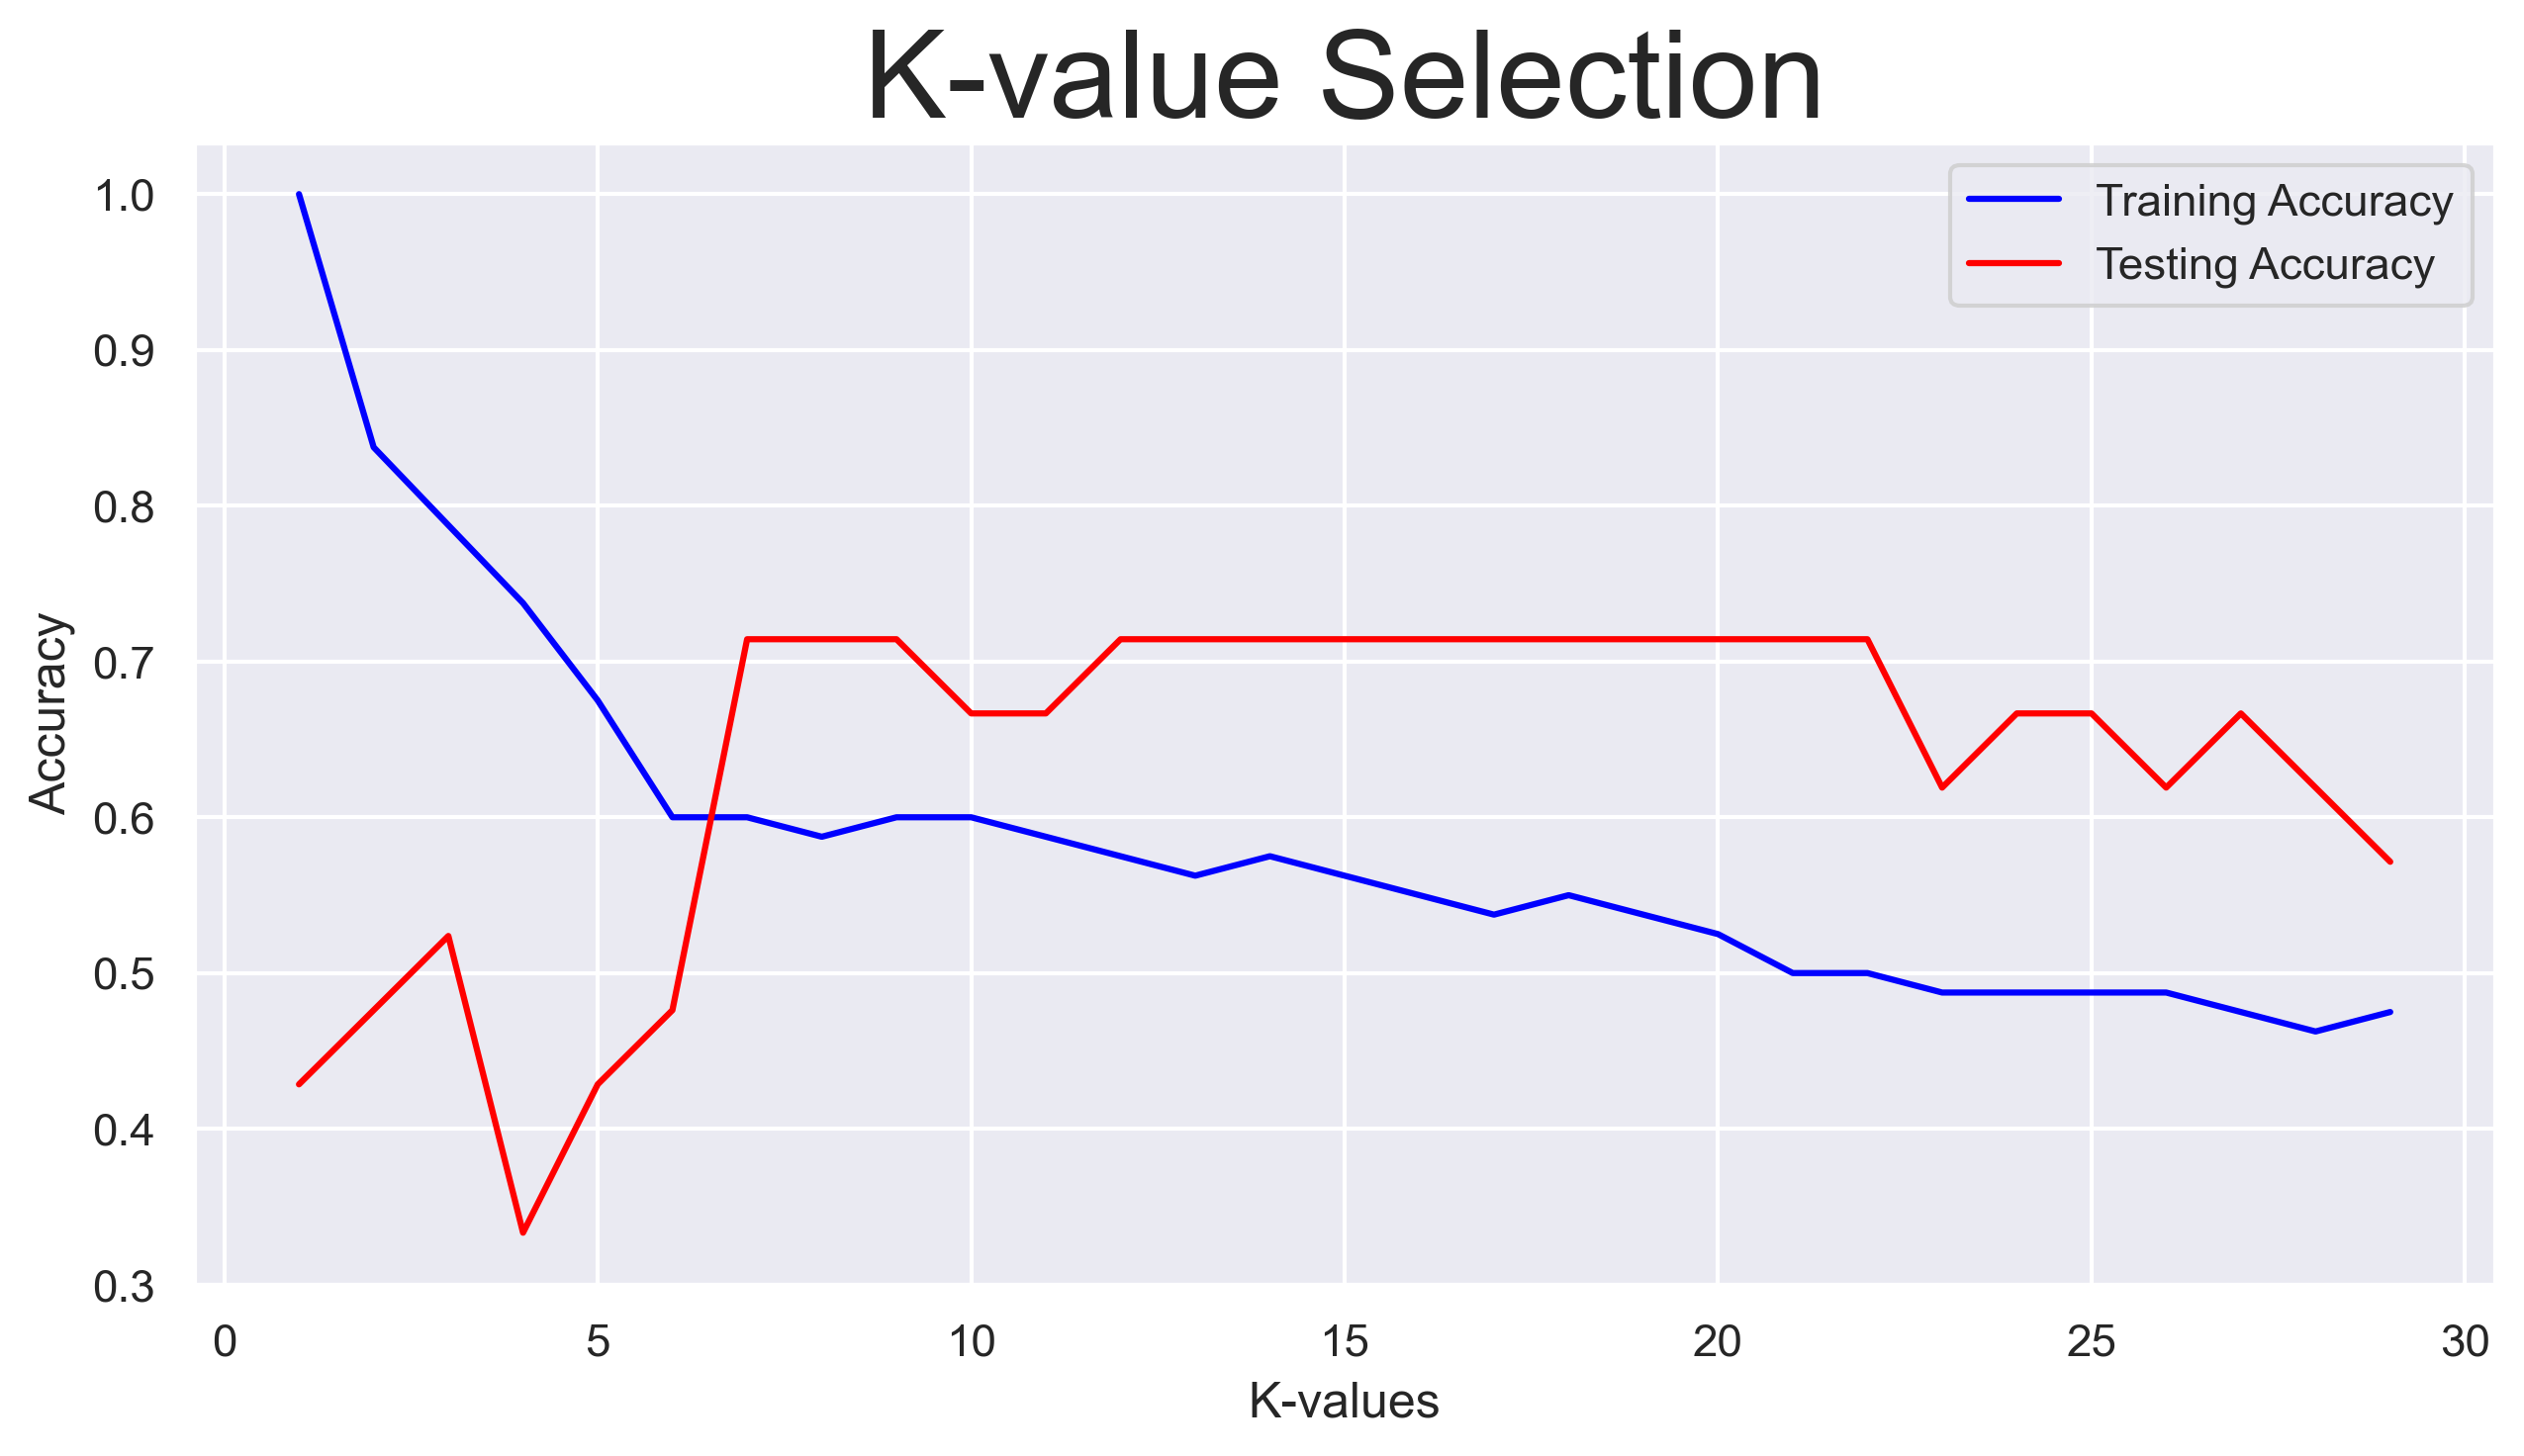

In [64]:
plt.plot(range(1,30), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,30), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.6
Test: 0.7142857142857143


In [67]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       0.83      1.00      0.91         5
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.71        21
   macro avg       0.32      0.47      0.35        21
weighted avg       0.68      0.71      0.68        21

